In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Input, Conv1D, MaxPool1D, Flatten, BatchNormalization, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras import optimizers
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [3]:
data_path = '/content/included_2016_nn_dataset_input.xlsx'
aglo_data = pd.read_excel(data_path, sheet_name="Sheet1")
data_numeric = aglo_data.apply(pd.to_numeric, errors='coerce').dropna()
X = data_numeric.drop(columns=["Sinter.SP4.Rozsev.Under5mm.%"])
y = data_numeric["Sinter.SP4.Rozsev.Under5mm.%"]

In [4]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
n_features = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], n_features, 1)
X_val = X_val.reshape(X_val.shape[0], n_features, 1)
X_test = X_test.reshape(X_test.shape[0], n_features, 1)
print("X_train shape:", X_train.shape)
print("X_train shape after reshaping:", X_train.shape)

X_train shape: (1617, 19, 1)
X_train shape after reshaping: (1617, 19, 1)


In [43]:
# CNN model
# Používa 6 konvolučných vrstiev, 4 MaxPool vrstvy, BatchNormalization
model = Sequential()
model.add(Input(shape=(n_features, 1)))
model.add(Conv1D(128, kernel_size=5, activation="relu", padding = 'same'))
model.add(BatchNormalization())
model.add(Conv1D(128, kernel_size=3, activation="relu", padding = 'same'))
model.add(MaxPool1D(pool_size=2))
model.add(Conv1D(64, kernel_size=2, activation="relu", padding = 'same'))

model.add(MaxPool1D(pool_size=2))
model.add(Conv1D(64, kernel_size=5, activation="relu", padding = 'same'))
model.add(BatchNormalization())
model.add(Conv1D(64, kernel_size=3, activation="relu", padding = 'same'))
model.add(MaxPool1D(pool_size=2))
model.add(Conv1D(64, kernel_size=2, activation="relu", padding = 'same'))

model.add(MaxPool1D(pool_size=2))
model.add(Flatten())

model.add(Dropout(0.1))
model.add(Dense(1, activation="relu"))

In [44]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=30,
    epochs=200
)

loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/200
54/54 [==============================] - 3s 20ms/step - loss: 18.9512 - val_loss: 68.8893
Epoch 2/200
54/54 [==============================] - 1s 16ms/step - loss: 12.1358 - val_loss: 40.3117
Epoch 3/200
54/54 [==============================] - 1s 15ms/step - loss: 11.8833 - val_loss: 25.7943
Epoch 4/200
54/54 [==============================] - 1s 17ms/step - loss: 11.7037 - val_loss: 23.9291
Epoch 5/200
54/54 [==============================] - 1s 20ms/step - loss: 11.1000 - val_loss: 19.4319
Epoch 6/200
54/54 [==============================] - 1s 27ms/step - loss: 10.6420 - val_loss: 17.5833
Epoch 7/200
54/54 [==============================] - 1s 24ms/step - loss: 10.1900 - val_loss: 18.4825
Epoch 8/200
54/54 [==============================] - 1s 20ms/step - loss: 9.5186 - val_loss: 15.7836
Epoch 9/200
54/54 [==============================] - 1s 15ms/step - loss: 9.3008 - val_loss: 16.3763
Epoch 10/200
54/54 [==============================] - 1s 16ms/step - loss: 8.5169 - 

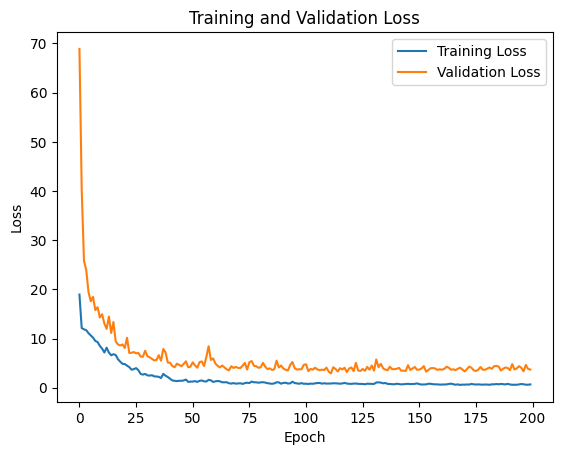

In [45]:
# Porovnanie chýb pri trénovaní
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [46]:
predicted_values = model.predict(X_test)

# Vypísanie predikovaných a skutočných hodnôt
for i in range(len(predicted_values)):
    print("Predikovaná hodnota:", predicted_values[i][0], "| Skutočná hodnota:", y_test.iloc[i])

19/19 [==============================] - 0s 5ms/step
Predikovaná hodnota: 10.5236225 | Skutočná hodnota: 18.3899993896484
Predikovaná hodnota: 11.265716 | Skutočná hodnota: 11.460000038147
Predikovaná hodnota: 6.9282694 | Skutočná hodnota: 6.88000011444092
Predikovaná hodnota: 7.6566806 | Skutočná hodnota: 7.3899998664856
Predikovaná hodnota: 8.3245535 | Skutočná hodnota: 9.09000015258789
Predikovaná hodnota: 9.504243 | Skutočná hodnota: 8.85000038146973
Predikovaná hodnota: 10.322078 | Skutočná hodnota: 7.88000011444092
Predikovaná hodnota: 8.660818 | Skutočná hodnota: 8.47999954223633
Predikovaná hodnota: 7.4936924 | Skutočná hodnota: 7.19000005722046
Predikovaná hodnota: 11.172423 | Skutočná hodnota: 11.4499998092651
Predikovaná hodnota: 8.910568 | Skutočná hodnota: 8.56999969482422
Predikovaná hodnota: 9.990116 | Skutočná hodnota: 9.89000034332275
Predikovaná hodnota: 6.774812 | Skutočná hodnota: 6.71000003814697
Predikovaná hodnota: 11.533216 | Skutočná hodnota: 11.2399997711182
P

19/19 [==============================] - 0s 12ms/step


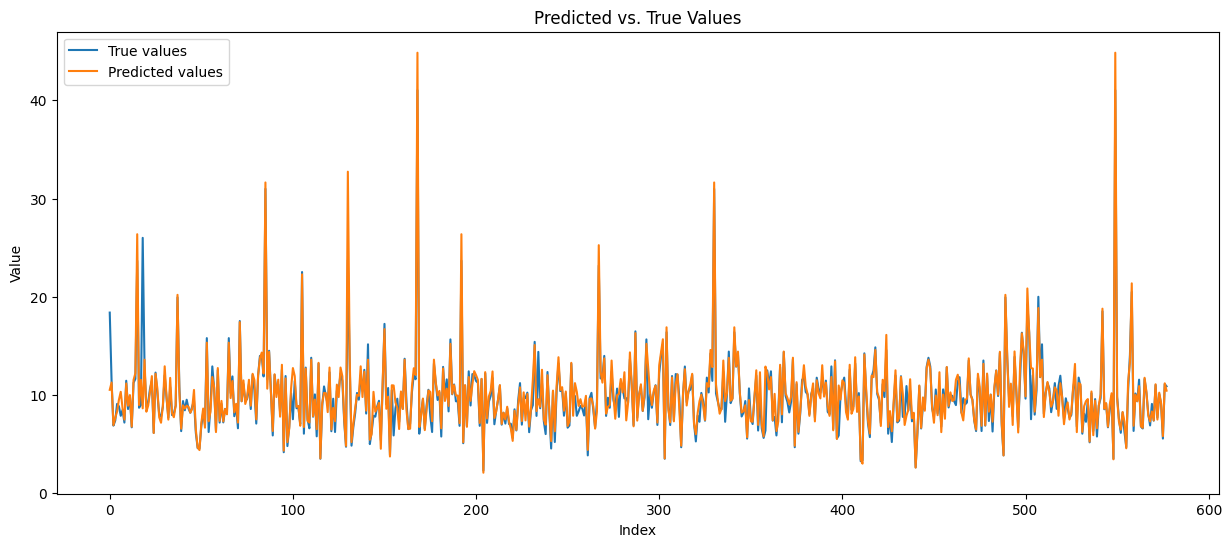

In [49]:
# Graf pre porovnanie reálnych a predikovaných hodnôt
predicted_values = model.predict(X_test)

plt.figure(figsize=(15, 6))

plt.plot(y_test.values, label="True values")
plt.plot(predicted_values, label="Predicted values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Predicted vs. True Values")
plt.legend()
plt.show()

In [50]:
# Accuracy
def custom_accuracy(y_true, y_pred) :
  bias = np.abs((np.sum(y_true) - np.sum(y_pred)) / len(y_true))
  print(bias)
  accuracy = 1 - bias
  return accuracy

print("Accuracy: ", custom_accuracy(y_test, predicted_values))

# Mean Absolute Error
mae = mean_absolute_error(y_test, predicted_values)
print("Mean Absolute Error:", mae)

# Mean Squared Error
mse = mean_squared_error(y_test, predicted_values)
print("Mean Squared Error:", mse)

# R2 score
r2 = r2_score(y_test, predicted_values)
print("R2 score:", r2)

0.1704125247612147
Accuracy:  0.8295874752387853
Mean Absolute Error: 0.6091291920949015
Mean Squared Error: 1.663007393317284
R2 score: 0.8873851733184261
